# Библиотека torch

In [1]:
# см. pytorch_basics.ipynb

<img src="images/torch.png" width=60% height=60%>
TensorFlow проиграла (кроме TensorFlow lite)

## PyTorch — ваш новый фреймворк глубокого обучения
https://habr.com/ru/post/334380/

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

Установка
```bash
pip install torch
```
или https://pytorch.org/get-started/locally/

## Математика

In [4]:
import numpy as np
import torch

### Типы Тензоров

In [3]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

### Создание тензора

In [2]:
x = torch.Tensor([1, 3, 5, 2, 1.3])
print(x)
x = torch.linspace(-np.pi, np.pi, 20, dtype=torch.float32)
print(x)
x = torch.arange(0, 10, 0.5, dtype=torch.float32)
print(x)
x = torch.ones(2, 1, 3, dtype=torch.float32)
print(x)

tensor([1.0000, 3.0000, 5.0000, 2.0000, 1.3000])
tensor([-3.1416, -2.8109, -2.4802, -2.1495, -1.8188, -1.4881, -1.1574, -0.8267,
        -0.4960, -0.1653,  0.1653,  0.4960,  0.8267,  1.1574,  1.4881,  1.8188,
         2.1495,  2.4802,  2.8109,  3.1416])
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000, 5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000,
        9.0000, 9.5000])
tensor([[[1., 1., 1.]],

        [[1., 1., 1.]]])


In [27]:
x = torch.Tensor(2,3,4) # размер тензора
print(x)
print(x.shape)

tensor([[[-1.0453e-05,  4.5687e-41, -1.3858e+13,  3.0868e-41],
         [ 4.4842e-44,  0.0000e+00,  8.9683e-44,  0.0000e+00],
         [-1.6435e+13,  3.0868e-41,  0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 9.1835e-41,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  9.1084e-44,  0.0000e+00]]])
torch.Size([2, 3, 4])


In [3]:
# From NumPy
a = np.random.rand(3, 3)
print(a)
b = torch.from_numpy(a)
b

[[0.10724207 0.55181834 0.5096208 ]
 [0.71071211 0.0153068  0.48715258]
 [0.38828255 0.69704577 0.48794508]]


tensor([[0.1072, 0.5518, 0.5096],
        [0.7107, 0.0153, 0.4872],
        [0.3883, 0.6970, 0.4879]], dtype=torch.float64)

### Инициализация тензора

In [ ]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)

x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

### Операции над тензорами 

### Изменение формы
`np.reshape()` == `torch.view()`:

In [26]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
print(b.shape)
print(b.view(3, 2).shape)

b = b[None, :,  :]
#Тензор b можно развернуть в одномерный массив с помощью функции torch.view(-1), чтобы результат был вектором

torch.Size([2, 3])
torch.Size([3, 2])


**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

### Изменение типа тензора

In [10]:
a = torch.FloatTensor([1.5, 3.2, -7])
print(a.type_as(torch.IntTensor()) )
print(a.to(torch.int32))

print(a.type_as(torch.ByteTensor()))
print(a.to(torch.uint8))

tensor([ 1,  3, -7], dtype=torch.int32)
tensor([ 1,  3, -7], dtype=torch.int32)
tensor([  1,   3, 249], dtype=torch.uint8)
tensor([  1,   3, 249], dtype=torch.uint8)


**Примечание:** `.type_as()` создает новый тензор, но старый остается неизменным

In [11]:
a

tensor([ 1.5000,  3.2000, -7.0000])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [2]:
a = torch.Tensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.Tensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [13]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [35]:
b += a
b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [40]:
print(a - b)
print(a.sub(b) )
print('\nПоэлементное умножение')
print(a * b)
print(a.mul(b))
print('\nМатричное умножение')
print(a @ b) # Матричное умножение !!!
print(a.mm(b))
print('\n Деление')
print(a / b) # Поэлементное деление
print(a.div(b))

tensor([[   1.,    2.,    3.],
        [  10.,   20.,   30.],
        [-100., -200., -300.]])
tensor([[   1.,    2.,    3.],
        [  10.,   20.,   30.],
        [-100., -200., -300.]])

Поэлементное умножение
tensor([[     0.,      0.,      0.],
        [     0.,      0.,      0.],
        [ 20000.,  80000., 180000.]])
tensor([[     0.,      0.,      0.],
        [     0.,      0.,      0.],
        [ 20000.,  80000., 180000.]])

Матричное умножение
tensor([[   600.,   1200.,   1800.],
        [  6000.,  12000.,  18000.],
        [ 60000., 120000., 180000.]])
tensor([[   600.,   1200.,   1800.],
        [  6000.,  12000.,  18000.],
        [ 60000., 120000., 180000.]])

 Деление
tensor([[   inf,    inf,    inf],
        [   inf,    inf,    inf],
        [0.5000, 0.5000, 0.5000]])
tensor([[   inf,    inf,    inf],
        [   inf,    inf,    inf],
        [0.5000, 0.5000, 0.5000]])


**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

### Операторы сравнения

In [3]:
a = torch.Tensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.Tensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])
a == b
# a != b
# a < b
# a > b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

### Использование индексации по логической маске

In [18]:
a[a > b]
# b[a == b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

### Поэлементное применение **универсальных функций**

In [4]:
torch.manual_seed(42)
a = torch.randn((3, 2))  # Normal(0, 1) с размером (3, 2)
b = torch.randn((3, 2))
c = torch.randn((2, 4))
print(a)
print(b)
print(c)

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863]])
tensor([[ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])
tensor([[ 1.1103, -1.6898, -0.9890,  0.9580],
        [ 1.3221,  0.8172, -0.7658, -0.7506]])


In [5]:
print(a + b ** 2)
print(torch.sin(a)) # a.sin()
print(torch.cos(c)) # c.cos()
print((a * 10).int())
# a.sin()
# a.sum()
# a.tan()
# a.exp()
# a.log()
# a.abs()

tensor([[ 5.2128,  0.5358],
        [ 0.4476,  0.3018],
        [-0.8367,  0.4687]])
tensor([[ 0.3304,  0.1285],
        [ 0.2323,  0.2283],
        [-0.9013, -0.1853]])
tensor([[ 0.4444, -0.1187,  0.5496,  0.5752],
        [ 0.2461,  0.6843,  0.7208,  0.7313]])
tensor([[  3,   1],
        [  2,   2],
        [-11,  -1]], dtype=torch.int32)


#### Применение функции вдоль оси

In [6]:
# Сумма
print(a.sum())
print(a.sum(dim=0)) # в numpy "axis"

tensor(-0.3789)
tensor([-0.5517,  0.1728])


In [7]:
a.sum(dim=1)

tensor([ 0.4655,  0.4648, -1.3092])

In [8]:
# Среднее 
a.mean(dim=0)
# и т.д.

tensor([-0.1839,  0.0576])

In [9]:
# Функция, позволяющая стандартизировать изображение по каждому каналу, то есть сделать так, 
# чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """
    m = A.mean(dim=(2,3))
    sigma = A.std(dim =(2, 3))
    result = (A - m[:, :, None, None])/sigma[:, :, None, None]
    return result

In [11]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)
#normalize_pictures(batch)

### immutable функции

<img src="images/LessonsII/immutable.png" width=60% height=60%>

In [24]:
print(a.sub(b)) # copy
print(a)

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])
tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])


In [25]:
a.sub_(b) # inplace
print(a)

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])


**Примечание** функции, изменяющие размер тензора всегда являются immutable.

#### Основное оличие от numpy

In [5]:
# До выполнения операций градиенты не заданы
a = torch.rand(2, 3, dtype=torch.float32, requires_grad=True)
x = torch.rand(2, 3, dtype=torch.float32, requires_grad=False)
y = torch.rand(2, 3, dtype=torch.float32, requires_grad=False)
print(a.grad, x.grad, y.grad)
print(a)
print(x)

None None None
tensor([[0.6343, 0.3644, 0.7104],
        [0.9464, 0.7890, 0.2814]], requires_grad=True)
tensor([[0.7886, 0.5895, 0.7539],
        [0.1952, 0.0050, 0.3068]])


In [6]:
y_pred = a ** 2 + x ** 3
loss = (y_pred - y).pow(2).sum()
loss.backward()
print(a.grad, x.grad, y.grad)

tensor([[ 1.9700, -0.8347,  0.8219],
        [ 0.7421, -0.1122, -0.4314]]) None None


# Вычисления на GPU

<img src="https://pytorch.org/assets/images/cudagraphs-pytorch.png" alt="CUDA" width=30% height=30%>


<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/5e2/048/3f5/5e20483f59e87b0a395b0fae0e6495c5.png" alt="CUDAplot" width=80% height=80%>

**FLOPS** (FLoating-point Operations Per Second) — внесистемная единица, используемая для измерения производительности компьютеров, показывающая, сколько операций с плавающей запятой в секунду выполняет данная вычислительная система.

## Архитектура CPU
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/df0/8c2/4c3/df08c24c3fe92cd97356670729c318cd.png" alt="CUDAplot" width=40% height=40%>
ALU (Арифметико-логическое устройство) — блок процессора, который под управлением устройства управления служит для выполнения арифметических и логических преобразований (начиная от элементарных) над данными

## Архитектура GPU
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/0fe/138/0cc/0fe1380ccbb321b289d16e39a499009a.png" alt="CUDAplot" width=40% height=40%>

Архитектура ядра GPU и логических элементов существенно проще, чем на CPU, а именно, отсутствуют Momory pre-fetcher, Branch predictor и прочие вспомогательные блоки.

In [2]:
# Определение, доступна ли CUDA
torch.cuda.is_available()

True

```python
x = torch.Tensor([1, 3, 5, 2, 1.3], device='cpu')
x = torch.Tensor([1, 3, 5, 2, 1.3], device='cuda:0')
```
или
```python
device = torch.device('cuda:0')
x = torch.Tensor([1, 3, 5, 2, 1.3], device=device)
```

```python
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
```

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на пред. лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически

# Нейронные сети

### Barebone подход:

**Реализация функции forward**

In [12]:
# Реализуйте функцию forward_pass(X, w) для одного нейрона нейронной сети с активацией sigmoid. Используйте библиотеку PyTorch
def forward_pass(X, w):
  logits = X @ w
  result  = torch.sigmoid(logits)
  return result

In [13]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
forward_pass(X, w)

torch.Size([3, 2])
torch.Size([2, 1])


tensor([[1.0000],
        [0.9985],
        [0.0474]])

**Реализация функции backward**

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

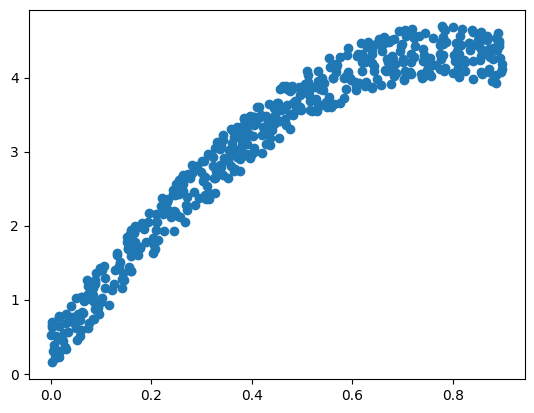

In [14]:
# Задание. Реализуйте обучение в логистической регрессии
# Синтетические данные
N = 500
x = 0.9 * np.random.rand(N)
y = 4*np.sin(2*x) + 0.7*np.random.rand(N)
plt.scatter(x, y)
plt.show()

In [15]:
# Синтетические данные
# numpy.array -> torch.tensor
x = torch.from_numpy(x).to(torch.float32)
y =  torch.from_numpy(y).to(torch.float32)

# коэффициенты модели y = wx + b
w = torch.zeros(1, requires_grad=True) 
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([0.], requires_grad=True), tensor([0.], requires_grad=True))

In [66]:
y_pred = w*x + b
loss = torch.mean((y_pred - y)**2)
# propagete gradients
loss.backward()

In [67]:
# Производные по w и b
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-3.3106])
dL/db = 
 tensor([-6.0166])


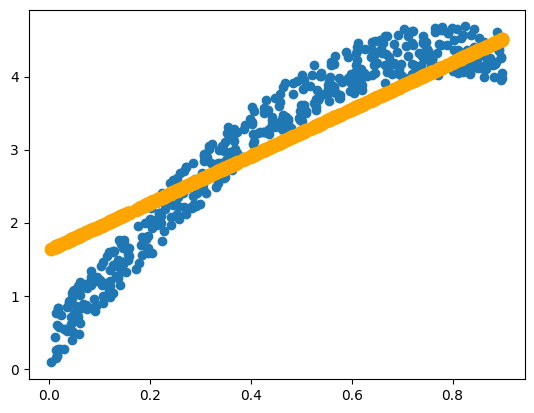

loss =  0.2944487
Done!


In [70]:
# backpropagation

lr = 0.05 # learning rate
for i in range(100):
    y_pred = w * x + b
    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)
    # Вычисляем градиенты
    loss.backward()
    # Делаем шаг градиентного спуска по матрице весов
    w.data -= lr*w.grad.data
    b.data -= lr*b.grad.data
    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=4)
        plt.show()
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.3: # Условие ранней остановки обучения
            print("Done!")
            break

### 'nn.Module' подход:

**Создание класса нейронной сети**

In [5]:
import torch.nn as nn

# Родительский класс для всех моделей и их элементов
nn.Module

method_list = [method for method in dir(nn.Module) if not method.startswith('_') and callable(getattr(nn.Module, method))]
print("Список методов:\n", method_list)

Список методов:
 ['add_module', 'apply', 'bfloat16', 'buffers', 'children', 'cpu', 'cuda', 'double', 'eval', 'extra_repr', 'float', 'forward', 'half', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named_parameters', 'parameters', 'register_backward_hook', 'register_buffer', 'register_forward_hook', 'register_forward_pre_hook', 'register_full_backward_hook', 'register_parameter', 'requires_grad_', 'share_memory', 'state_dict', 'to', 'train', 'type', 'xpu', 'zero_grad']


In [6]:
# Простая модель
class SimpleModel(nn.Module):
    def __init__(self, in_ch, out_ch):
        """Регистрация блоков"""
        super().__init__()
        self.fci = nn.Linear(in_ch, 32)  # Полносвязный слой 1
        self.fc2 = nn.Linear(32, out_ch, bias=False)  # Полносвязный слой 2
        self.relu = nn.ReLU()  # Функция активации
        
    def forward(self, x):
        """Прямой проход"""
        h = self.fc1(x)
        h = self.relu(h)
        h = self.fc2(h)
        y = self.relu(h)
        return y

In [7]:
model = SimpleModel(64, 10)

print('Model:', model)
print('FC1:', model.fc1)
print()
print('Weight:', model.fc1.weight.shape, '\n', model.fc1.weight)
print()
print('Weight:', model.fc1.bias.shape, '\n', model.fc1.bias)

Model: SimpleModel(
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=False)
  (relu): ReLU()
)
FC1: Linear(in_features=64, out_features=32, bias=True)

Weight: torch.Size([32, 64]) 
 Parameter containing:
tensor([[-0.1246,  0.1232, -0.0449,  ...,  0.0116, -0.0236,  0.1191],
        [ 0.0767, -0.1046, -0.0425,  ...,  0.1227,  0.0012,  0.1055],
        [ 0.0258,  0.0047, -0.0209,  ..., -0.0704, -0.0046,  0.0842],
        ...,
        [-0.1247, -0.0645, -0.0423,  ...,  0.0366, -0.0008,  0.0898],
        [-0.0050,  0.0940,  0.0200,  ...,  0.0056, -0.0549, -0.0884],
        [ 0.0339,  0.1164, -0.0084,  ...,  0.0362,  0.0308, -0.0827]],
       requires_grad=True)

Weight: torch.Size([32]) 
 Parameter containing:
tensor([ 0.0243,  0.0347, -0.0083, -0.0057, -0.0346, -0.1042,  0.0297,  0.1074,
        -0.0153,  0.0198, -0.0969, -0.1207,  0.0790, -0.0366,  0.0251,  0.0321,
        -0.0531,  0.0808,  0.0463,  0.0290, -0.0484, -0.107

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0978, -0.0888,  0.0079,  ..., -0.0748,  0.0003, -0.0465],
         [-0.0087, -0.0847, -0.0858,  ..., -0.0445,  0.0652,  0.0657],
         [ 0.0467, -0.0220, -0.0331,  ...,  0.0415, -0.0371,  0.0772],
         ...,
         [-0.1192,  0.0228,  0.0171,  ...,  0.0446, -0.1053, -0.0153],
         [ 0.0475,  0.1020,  0.0376,  ...,  0.0884,  0.0099, -0.0895],
         [-0.0947, -0.0487,  0.0364,  ..., -0.0513, -0.0247,  0.0608]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0029,  0.1069, -0.0072, -0.0179,  0.0706, -0.0032, -0.0249,  0.0418,
          0.0986,  0.0312,  0.0870,  0.0810,  0.0353,  0.0435,  0.0403,  0.0130,
          0.1063,  0.1154,  0.0445, -0.0062,  0.1121, -0.0973,  0.0918,  0.0662,
          0.0803, -0.0096, -0.0933,  0.0892, -0.0547,  0.0329,  0.0708, -0.1168],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0117, -0.0628,  0.1255, -0.1126,  0.1073,  0.1102,  0.0975,  0.1697,
           0.0268, -0.160

### Проход модели

In [12]:
x = torch.rand(4, 64)  # batch size = 4
y = torch.rand(4, 10)

w1_1 = model.fc1.weight.data.clone()  # Сохранение состояния весов

y_pred = model(x)  # Прямой проход
y_pred

tensor([[0.0447, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0899],
        [0.1487, 0.0000, 0.0328, 0.0000, 0.0000, 0.0000, 0.0132, 0.0000, 0.0000,
         0.0056],
        [0.1124, 0.0000, 0.1217, 0.0000, 0.0000, 0.0000, 0.0245, 0.0000, 0.0260,
         0.0228],
        [0.1245, 0.0000, 0.0407, 0.0000, 0.0000, 0.0000, 0.0208, 0.0000, 0.0000,
         0.0340]], grad_fn=<ReluBackward0>)

In [13]:
# Функция потерь L1 (MAE)
l1_loss = nn.L1Loss()
loss = l1_loss(y, y_pred)
print('Loss:', loss)

print('Grad before:', model.fc1.weight.grad)
loss.backward()  # Обратный проход
print('Grad after:', model.fc1.weight.grad)

Loss: tensor(0.6101, grad_fn=<L1LossBackward>)
Grad before: None
Grad after: tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0058,  0.0047,  0.0101,  ...,  0.0026,  0.0090,  0.0050],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0046, -0.0006, -0.0052,  ..., -0.0026, -0.0051, -0.0006]])


In [14]:
w1_2 = model.fc1.weight.data.clone()
print(w1_2 - w1_1)  # Веса не изменились

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Обновление весов 

Для обновления весов в модели используются оптимизаторы:  
  
* SGD (Stochastic Gradient Descent) для оптимизации импульса.
* RMSprop – адаптивная оптимизация скорости обучения по методу Джеффа Хинтона.
* Adam – адаптивная оценка моментов, которая также использует адаптивную скорость обучения.

In [15]:
# Создание оптимизатора
opt = torch.optim.SGD(model.parameters(), lr=0.001)

In [16]:
opt.step()

In [17]:
w1_3 = model.fc1.weight.data.clone()
print(w1_3 - w1_2)  # Веса обновились

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-5.8291e-06, -4.6641e-06, -1.0058e-05,  ..., -2.6152e-06,
         -8.9854e-06, -4.9695e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.6343e-06,  6.4820e-07,  5.2191e-06,  ...,  2.5630e-06,
          5.0627e-06,  6.2957e-07]])


In [18]:
# Градиенты всё ещё содержат старые значения, потому при следующем вычислении они будут учитываться
model.fc1.weight.grad

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0058,  0.0047,  0.0101,  ...,  0.0026,  0.0090,  0.0050],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0046, -0.0006, -0.0052,  ..., -0.0026, -0.0051, -0.0006]])

In [19]:
# Чтобы обнулить градиенты, используем метод zero_grad() у оптимизатора
opt.zero_grad()
model.fc1.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### Batch
Batch (пакет) – количество обучающих примеров за одну итерацию. Чем больше batch size, тем больше места будет необходимо. Если batch size маленький, то изменение весов будет подстраиваться под отдельные примеры, а не под общие тенденции.

# Создание датасета

In [20]:
import torch.utils.data as data

In [21]:
class GeneratorDataset(data.Dataset):
    def __init__(self, in_size, out_size, num_samples, func='sin'):
        super().__init__()
        self.num_samples = num_samples
        self.in_size = in_size
        self.out_size = out_size
        self.func = func
        
    def __getitem__(self, index):
        x = torch.rand(self.in_size)
        if self.func == 'sin':
            x = torch.sin(x)
        elif self.func == 'cos':
            x = torch.cos(x)
        y = x[:self.out_size].clone()
        return x, y
    
    def __len__(self):
        return self.num_samples

In [22]:
dataset = GeneratorDataset(64, 10, 128)
dataloader = data.DataLoader(dataset, batch_size=16)
for x, y in dataloader:
    break
print(x.shape, y.shape)

torch.Size([16, 64]) torch.Size([16, 10])


### Обучение модели

In [23]:
model = SimpleModel(64, 10)
l1_loss = nn.L1Loss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
for x, y in dataloader:
    opt.zero_grad()
    
    y_pred = model(x)
    loss = l1_loss(y, y_pred)
    loss.backward()
    print('Loss', loss.item())
    opt.step()

Loss 0.44412118196487427
Loss 0.39865168929100037
Loss 0.4141206741333008
Loss 0.3751830458641052
Loss 0.39952030777931213
Loss 0.3894100785255432
Loss 0.35259371995925903
Loss 0.37724384665489197


## Модель
PyTorch - это гибкий фреймворк для построения любой нейронной сети.

Вот таблица сравнения:

```
| API             | Flexibility | Convenience |,
|-----------------|-------------|-------------|,
| Barebone        | High        | Low         |,
| `nn.Module`     | High        | Medium      |,
| `nn.Sequential` | Low         | High        |
```

1. barebone - это подход, при котором мы напрямую манипулируем тензорами. Если у нас есть целевая функция, напрямую выраженная весами и мы реализумем метод с использованием классов, мы получим API такого уровня: **На этом уровне мы сами кодируем модули**

2. [`nn.Module`] (https://pytorch.org/docs/stable/nn.html) - родительский класс для многих модулей, представленных PyTorch. Их много. Их достаточно, чтобы использовать их в готовом виде с необходимыми параметрами. В основном мы используем:

- `nn.Linear`
- `nn.Softmax`, `nn.LogSoftmax`
- `nn.ReLU`, `nn.ELU`, `nn.LeakyReLU`
- `nn.Tanh`, `nn.Sigmoid`
- `nn.LSTM`, `nn.GRU`
- `nn.Conv1d`, `nn.Conv2d`
- `nn.MaxPool1d`, `nn.AdaptiveMaxPool1d` and others pooling
- `nn.BatchNorm1d`, `nn.BatchNorm2d`
- `nn.Dropout`
- losses: `nn.CrossEntropyLoss`, `nn.NLLLoss`, `nn.MSELoss`
- etc


3. `nn.Sequential` - это не более чем последовательность различных модулей на основе` nn.Module`. Они инициируются списком модулей, где выходные данные одного модуля идут в качестве входных данных для следующего по порядку.


# Пример модели UNet
  
[Репозиторий](https://github.com/milesial/Pytorch-UNet)  

<img src="https://camo.githubusercontent.com/41ded1456b9dbe13b8d73d8da539dac95cb8aa721ebe5fb798af732ca9f04c92/68747470733a2f2f692e696d6775722e636f6d2f6a6544567071462e706e67" alt="UNet" width=80% height=80%>


## Задания

1. Написать SimpleModel на другом уровне абстракции. Использовать model = nn.Sequential() https://pytorch.org/tutorials/beginner/nn_tutorial.html?highlight=mnist
2.  С помощью библиотеки torch реализовать модель с прямым проходом, состоящую из 3 полносвязных слоёв с функциями активации: ReLU, tanh, Softmax. Длины векторов на входе 256, на выходе 4, промежуточные: 64 и 16. Использовать модули - `nn.Module`
3. Реализовать модель с прямым проходом, состоящую из 2 свёрток (Conv) с функциями активации ReLU и 2 функций MaxPool. Первый слой переводит из 3 каналов в 8, второй из 8 слоёв в 16. На вход подаётся изображение размера 19х19. (19х19x3 -> 18x18x8 -> 9x9x8 -> 8x8x16 -> 4x4x16). Использовать модули - `nn.Module`
4. Объединить сети из п.2 и п.1. На выход изображение размера 19х19, на выходе вектор из 4 элементов
 


## Лабораторная работа 13.

1. С помощью библиотеки torch создать модель с прямым проходом, состоящую из 3 слоёв* с функциями активации: ReLu, ReLu, Softmax. 
2. Обучить нейросеть распознавать рукописные цифры на датасете MNIST (28х28 px). 
* Два первых слоя могут быть полносвязные или свёрточные на ваш выбор. Последний слой - это FC слой с 10 нейронами.